### problem 1.9

In [1]:
from csv import reader
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('prostate-train.csv','r') as f:
    data = [datum for datum in reader(f, delimiter = ",")]

data_array = np.asarray(data)
headers = data_array[0] # first row is headers
training_data = np.asarray(data_array[1:], dtype=np.float64)

In [3]:
A = training_data[:,:8]
const = np.ones(len(A))
A = np.insert(A,0,const,axis=1)

b = training_data[:,8]
w = np.zeros(9)
eta = 0.0000025
epoch = 1000000

In [4]:
sse = []
x = [i for i in range(epoch)]

In [5]:
for i in range(epoch):
    w = w - (np.transpose(A) @ A @ w - np.transpose(A) @ b) * 2 * eta
    sse.append(np.linalg.norm(A@w-b) ** 2)

In [6]:
w

array([ 0.29332229,  0.57464973,  0.6242766 , -0.0187258 ,  0.14278682,
        0.73856301, -0.20647887, -0.01632126,  0.00923619])

In [8]:
sse[-1]

29.430264028099494

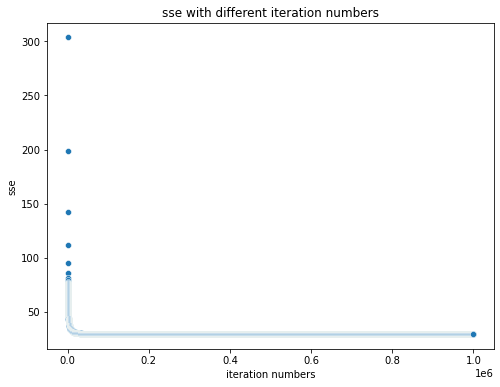

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(x=x, y=sse);
ax.set_xlabel('iteration numbers');
ax.set_ylabel('sse');
ax.set_title('sse with different iteration numbers');